<a href="https://colab.research.google.com/github/Lorenzo1208/Brief_fao/blob/main/Copie_de_Projet_guid%C3%A9%2B%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

filecsv = ['https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_animal.csv',
           'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_cereal.csv',
           'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_population.csv',
           'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_sous_alimentation.csv',
           'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_vegetal.csv',
           ]

x = len('https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_')



names = ['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole']

#on crée un dataframe pour chaque csv qui nous intéresse en unifiant les noms de colonnes

df_animal = pd.read_csv(filecsv[0], names = names, header = 0)
df_cereal = pd.read_csv(filecsv[1], names = names, header = 0)
df_population = pd.read_csv(filecsv[2], names = names, header = 0)
df_sous_alimentation = pd.read_csv(filecsv[3], names = names, header = 0)
df_vegetal = pd.read_csv(filecsv[4], names = names, header = 0)
df_vegetal

,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires,2,Afghanistan,5511,Production,2511,Blé,2013,2013,Milliers de tonnes,5169.00,S,Données standardisées
1,FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2511,Blé,2013,2013,Milliers de tonnes,1173.00,S,Données standardisées
2,FBS,Bilans Alimentaires,2,Afghanistan,5072,Variation de stock,2511,Blé,2013,2013,Milliers de tonnes,-350.00,S,Données standardisées
3,FBS,Bilans Alimentaires,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé,2013,2013,Milliers de tonnes,5992.00,S,Données standardisées
4,FBS,Bilans Alimentaires,2,Afghanistan,5527,Semences,2511,Blé,2013,2013,Milliers de tonnes,322.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104866,FBS,Bilans Alimentaires,351,Chine,674,Disponibilité de protéines en quantité (g/pers...,2680,Aliments pour enfants,2013,2013,g/personne/jour,0.04,Fc,Donnée calculée
104867,FBS,Bilans Alimentaires,351,Chine,684,Disponibilité de matière grasse en quantité (g...,2680,Aliments pour enfants,2013,2013,g/personne/jour,0.01,Fc,Donnée calculée
104868,FBS,Bilans Alimentaires,351,Chine,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2013,2013,Kcal/personne/jour,0.00,Fc,Donnée calculée
104869,FBS,Bilans Alimentaires,351,Chine,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2013,2013,g/personne/jour,0.01,Fc,Donnée calculée


In [100]:
#analyses univariées
df_animal.describe()

,Code Pays,Code Élément,Code Produit,Code Année,Année,Valeur
count,37166.000000,37166.000000,37166.000000,37166.0,37166.0,37166.000000
mean,126.800839,3511.032718,2758.421191,2013.0,2013.0,148.291647
std,74.767139,2332.283315,27.454449,0.0,0.0,1933.728473
min,1.000000,645.000000,2731.000000,2013.0,2013.0,-1368.000000
25%,63.000000,674.000000,2736.000000,2013.0,2013.0,0.000000
50%,121.000000,5142.000000,2762.000000,2013.0,2013.0,1.000000
75%,189.000000,5511.000000,2767.000000,2013.0,2013.0,11.000000
max,351.000000,5911.000000,2848.000000,2013.0,2013.0,135600.000000


Veuillez saisir le nom de la colonne à utiliser pour tracer le graphique: Valeur


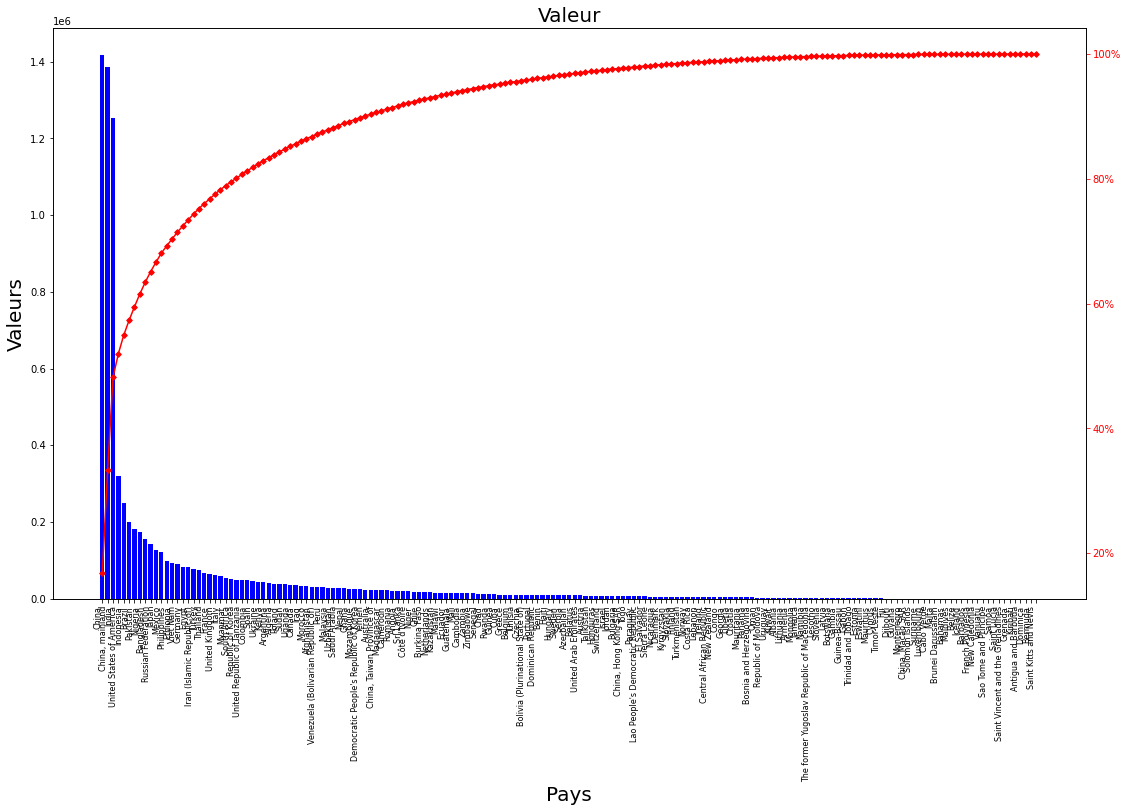

In [101]:
#analyses bivariées
#exemple d'un pareto

def create_graph(df_graph):
  # Demande à l'utilisateur de saisir le nom de la colonne à utiliser pour tracer le graphique
  column = input("Veuillez saisir le nom de la colonne à utiliser pour tracer le graphique: ")
  # Vérification que la colonne saisie existe dans le DataFrame
  if column not in df_graph.columns:
    print("La colonne saisie n'existe pas dans le DataFrame.")
    return
  # Tri du DataFrame par ordre décroissant sur la colonne courante
  df_graph = df_graph.sort_values(by=column, ascending=False)
  # Ajout d'une colonne cumulée qui contient la somme cumulée des valeurs de la colonne courante, exprimée en pourcentage
  cumperc = df_graph[column].cumsum()/df_graph[column].sum()*100
  df_graph['cumperc'] = cumperc
  color1 = 'blue'
  # Couleur de la ligne sur le graphique secondaire
  color2 = 'red'
  # Épaisseur de la ligne sur le graphique secondaire
  line_size = 4
  # Création des figures et des axes
  fig, ax = plt.subplots()
  # Tracé d'un graphique à barres
  plt.bar(df_graph.Pays, df_graph[column], color=color1)
  # Configuration de la taille de la figure
  fig.set_size_inches(18.5, 10.5)
  # Rotation des étiquettes sur l'axe des x et ajustement de leur taille
  plt.xticks(rotation=90, ha="right", fontsize=8)
  # Titre du graphique
  plt.title(column, fontsize=20)
  # Titre de l'axe des x
  plt.xlabel('Pays',fontsize=20)
  # Titre de l'axe des y
  plt.ylabel('Valeurs',fontsize=20)
  # Création d'un second axe pour tracer une ligne sur le même graphique
  ax2 = ax.twinx()
  # Tracé d'une ligne sur le graphique secondaire en utilisant les valeurs de la colonne 'cumperc'
  # La couleur de la ligne est définie par la variable 'color2'
  # Les marqueurs sont des losanges et leur taille est définie par la variable 'line_size'
  ax2.plot(df_graph.Pays, cumperc, color=color2, marker="D", ms=line_size)
  # Formatage des étiquettes de l'axe des y du graphique secondaire en pourcentage
  ax2.yaxis.set_major_formatter(PercentFormatter())
  # Modification de la couleur des étiquettes de l'axe des y du graphique secondaire
  ax2.tick_params(axis='y', colors=color2)
  # Affichage du graphique
  plt.show()

create_graph(df_population)

In [102]:
sum_of_column = df_population['Valeur'].sum()
print(sum_of_column*1000)
# On multiplie par l'unité donc x1000

8413993000


In [103]:
df_population['Valeur'].duplicated().value_counts()

False    175
Name: Valeur, dtype: int64

In [104]:
mask = df_population['Pays'].str.startswith("China")
df_china = df_population[mask]
display(df_china)

,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole
32,FBS,Food Balance Sheets,96,"China, Hong Kong SAR",511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,7204,NaN,Official data
33,FBS,Food Balance Sheets,128,"China, Macao SAR",511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,566,NaN,Official data
34,FBS,Food Balance Sheets,41,"China, mainland",511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,1385567,NaN,Official data
35,FBS,Food Balance Sheets,214,"China, Taiwan Province of",511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,23330,NaN,Official data
174,FBS,Food Balance Sheets,351,China,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,1416667,A,"Aggregate, may include official, semi-official..."


In [105]:
mask = df_population['Pays'] == "China"
df_population.drop(df_population[mask].index, inplace=True)
sum_of_column = df_population['Valeur'].sum()
print(sum_of_column*1000)

6997326000


In [147]:
# Animaux et végetaux
# df_animal df_vegetal
condition = df_cereal['Pays'] == "France"
df_france = df_cereal[condition]
df_france

,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole
5415,FBS,Bilans Alimentaires,68,France,5511,Production,2511,Blé,2013,2013,Milliers de tonnes,38614.00,S,Données standardisées
5416,FBS,Bilans Alimentaires,68,France,5611,Importations - Quantité,2511,Blé,2013,2013,Milliers de tonnes,2055.00,S,Données standardisées
5417,FBS,Bilans Alimentaires,68,France,5072,Variation de stock,2511,Blé,2013,2013,Milliers de tonnes,1131.00,S,Données standardisées
5418,FBS,Bilans Alimentaires,68,France,5911,Exportations - Quantité,2511,Blé,2013,2013,Milliers de tonnes,21502.00,S,Données standardisées
5419,FBS,Bilans Alimentaires,68,France,5301,Disponibilité intérieure,2511,Blé,2013,2013,Milliers de tonnes,20298.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5519,FBS,Bilans Alimentaires,68,France,5142,Nourriture,2520,"Céréales, Autres",2013,2013,Milliers de tonnes,47.00,S,Données standardisées
5520,FBS,Bilans Alimentaires,68,France,645,Disponibilité alimentaire en quantité (kg/pers...,2520,"Céréales, Autres",2013,2013,kg,0.73,Fc,Donnée calculée
5521,FBS,Bilans Alimentaires,68,France,664,Disponibilité alimentaire (Kcal/personne/jour),2520,"Céréales, Autres",2013,2013,Kcal/personne/jour,7.00,Fc,Donnée calculée
5522,FBS,Bilans Alimentaires,68,France,674,Disponibilité de protéines en quantité (g/pers...,2520,"Céréales, Autres",2013,2013,g/personne/jour,0.20,Fc,Donnée calculée


In [107]:
df = df_cereal[['Pays', 'Élément', 'Produit', 'Valeur']]
df = df[(df['Pays'] == 'France') & (df['Produit'] == 'Blé') ]
df

,Pays,Élément,Produit,Valeur
5415,France,Production,Blé,38614.00
5416,France,Importations - Quantité,Blé,2055.00
5417,France,Variation de stock,Blé,1131.00
5418,France,Exportations - Quantité,Blé,21502.00
5419,France,Disponibilité intérieure,Blé,20298.00
5420,France,Aliments pour animaux,Blé,7822.00
5421,France,Semences,Blé,748.00
5422,France,Pertes,Blé,358.00
5423,France,Traitement,Blé,1575.00
5424,France,Autres Utilisations,Blé,2824.00


In [108]:
prod = df['Valeur'].iloc[0]
importation = df['Valeur'].iloc[1]
variation = df['Valeur'].iloc[2]
exportation = df['Valeur'].iloc[3]
dispo = df['Valeur'].iloc[4]
aliments = df['Valeur'].iloc[5]
semences = df['Valeur'].iloc[6]
pertes = df['Valeur'].iloc[7]
traitement = df['Valeur'].iloc[8]
autres = df['Valeur'].iloc[9]
nourriture = df['Valeur'].iloc[10]
print(dispo, '=', prod+importation+variation-exportation, '=', semences+aliments+nourriture+autres+pertes+traitement)

20298.0 = 20298.0 = 20298.0


In [166]:
aliments = pd.concat([df_animal, df_vegetal, df_population], axis=0)
# Vérifie si il y a des colonnes en double en utilisant la propriété columns.duplicated() de DataFrame retournant un tableau booléen indiquant si chaque colonne est en double ou non,puis supprimer les colonnes en double
aliments = aliments.loc[:, ~aliments.columns.duplicated()]
aliments

,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,2013,Milliers de tonnes,134.00,S,Données standardisées
1,FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,2013,Milliers de tonnes,6.00,S,Données standardisées
2,FBS,Bilans Alimentaires,2,Afghanistan,5301,Disponibilité intérieure,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées
3,FBS,Bilans Alimentaires,2,Afghanistan,5142,Nourriture,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées
4,FBS,Bilans Alimentaires,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2013,2013,kg,4.59,Fc,Donnée calculée
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,FBS,Food Balance Sheets,236,Venezuela (Bolivarian Republic of),511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,30405.00,NaN,Official data
170,FBS,Food Balance Sheets,237,Viet Nam,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,91680.00,NaN,Official data
171,FBS,Food Balance Sheets,249,Yemen,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,24407.00,NaN,Official data
172,FBS,Food Balance Sheets,251,Zambia,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,14539.00,NaN,Official data


In [110]:
missing_values = aliments.isna().sum()
missing_values 

Code Domaine                0
Domaine                     0
Code Pays                   0
Pays                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code Année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                   174
Description du Symbole      0
dtype: int64

In [111]:
aliments.describe()

,Code Pays,Code Élément,Code Produit,Code Année,Année,Valeur
count,142211.000000,142211.000000,142211.000000,142211.0,142211.0,1.422110e+05
mean,127.458312,3667.543980,2632.042015,2013.0,2013.0,3.248746e+02
std,75.250455,2294.447467,92.794322,0.0,0.0,7.673778e+03
min,1.000000,511.000000,2501.000000,2013.0,2013.0,-3.986300e+04
25%,66.000000,674.000000,2556.000000,2013.0,2013.0,0.000000e+00
50%,121.000000,5142.000000,2613.000000,2013.0,2013.0,1.000000e+00
75%,189.000000,5511.000000,2734.000000,2013.0,2013.0,1.500000e+01
max,351.000000,5911.000000,2899.000000,2013.0,2013.0,1.385567e+06


In [112]:
aliments.nunique()

Code Domaine                 1
Domaine                      2
Code Pays                  175
Pays                       295
Code Élément                16
Élément                     16
Code Produit                99
Produit                     99
Code Année                   1
Année                        1
Unité                        5
Valeur                    7257
Symbole                      3
Description du Symbole       4
dtype: int64

In [167]:
population = aliments.groupby("Pays")["Valeur"].sum()
aliments = pd.merge(aliments, population, on="Pays", how = "left", suffixes=("", "_population"))
aliments = aliments.rename(columns={'Valeur_population':'population'})
aliments

,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole,population
0,FBS,Bilans Alimentaires,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,2013,Milliers de tonnes,134.00,S,Données standardisées,74177.17
1,FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,2013,Milliers de tonnes,6.00,S,Données standardisées,74177.17
2,FBS,Bilans Alimentaires,2,Afghanistan,5301,Disponibilité intérieure,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées,74177.17
3,FBS,Bilans Alimentaires,2,Afghanistan,5142,Nourriture,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées,74177.17
4,FBS,Bilans Alimentaires,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2013,2013,kg,4.59,Fc,Donnée calculée,74177.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142206,FBS,Food Balance Sheets,236,Venezuela (Bolivarian Republic of),511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,30405.00,NaN,Official data,30405.00
142207,FBS,Food Balance Sheets,237,Viet Nam,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,91680.00,NaN,Official data,425830.56
142208,FBS,Food Balance Sheets,249,Yemen,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,24407.00,NaN,Official data,24407.00
142209,FBS,Food Balance Sheets,251,Zambia,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,14539.00,NaN,Official data,14539.00


In [114]:
aliments.describe()

,Code Pays,Code Élément,Code Produit,Code Année,Année,Valeur,population
count,142211.000000,142211.000000,142211.000000,142211.0,142211.0,1.422110e+05,1.422110e+05
mean,127.458312,3667.543980,2632.042015,2013.0,2013.0,3.248746e+02,2.718748e+05
std,75.250455,2294.447467,92.794322,0.0,0.0,7.673778e+03,8.652994e+05
min,1.000000,511.000000,2501.000000,2013.0,2013.0,-3.986300e+04,5.400000e+01
25%,66.000000,674.000000,2556.000000,2013.0,2013.0,0.000000e+00,1.797150e+04
50%,121.000000,5142.000000,2613.000000,2013.0,2013.0,1.000000e+00,5.149226e+04
75%,189.000000,5511.000000,2734.000000,2013.0,2013.0,1.500000e+01,1.418620e+05
max,351.000000,5911.000000,2899.000000,2013.0,2013.0,1.385567e+06,6.295422e+06


In [127]:
aliments.columns

Index(['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole', 'population'],
      dtype='object')

In [138]:
aliments_subset = aliments[["Pays", "Élément", "Produit", "Unité", "Valeur", "population"]]

In [139]:
aliments_subset.columns

Index(['Pays', 'Élément', 'Produit', 'Unité', 'Valeur', 'population'], dtype='object')

In [150]:
aliments_subset

,Pays,Élément,Produit,Unité,Valeur,population
0,Afghanistan,Production,Viande de Bovins,Milliers de tonnes,134.00,74177.17
1,Afghanistan,Importations - Quantité,Viande de Bovins,Milliers de tonnes,6.00,74177.17
2,Afghanistan,Disponibilité intérieure,Viande de Bovins,Milliers de tonnes,140.00,74177.17
3,Afghanistan,Nourriture,Viande de Bovins,Milliers de tonnes,140.00,74177.17
4,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,Viande de Bovins,kg,4.59,74177.17
...,...,...,...,...,...,...
142206,Venezuela (Bolivarian Republic of),Total Population - Both sexes,Population,1000 persons,30405.00,30405.00
142207,Viet Nam,Total Population - Both sexes,Population,1000 persons,91680.00,425830.56
142208,Yemen,Total Population - Both sexes,Population,1000 persons,24407.00,24407.00
142209,Zambia,Total Population - Both sexes,Population,1000 persons,14539.00,14539.00


In [146]:
# Filtrer les lignes correspondant à la disponibilité alimentaire en kcal/personne/jour
aliments_kcal = aliments_subset.loc[(aliments_subset["Élément"] == "Disponibilité alimentaire (Kcal/personne/jour)") & (aliments_subset["Unité"] == "Kcal/personne/jour")]
# Regrouper par Pays et Produit et calculer la somme de la disponibilité alimentaire par population
aliments_kcal_grouped = aliments_kcal.groupby(["Pays", "Produit"]).sum()
aliments_kcal_grouped["disponibilité alimentaire en kcal/an"] = aliments_kcal_grouped["Valeur"]*365*aliments_kcal_grouped["population"]
aliments_kcal_grouped

Valeur  population  \
Pays         Produit                                     
Afghanistan  Abats Comestible          5.0    74177.17   
             Agrumes, Autres           1.0    74177.17   
             Aliments pour enfants     1.0    74177.17   
             Ananas                    0.0    74177.17   
             Bananes                   4.0    74177.17   
...                                    ...         ...   
Îles Salomon Viande de Suides         45.0     5453.21   
             Viande de Volailles      11.0     5453.21   
             Viande, Autre             0.0     5453.21   
             Vin                       0.0     5453.21   
             Épices, Autres            4.0     5453.21   

                                    disponibilité alimentaire en kcal/an  
Pays         Produit                                                      
Afghanistan  Abats Comestible                               1.353733e+08  
             Agrumes, Autres                                2.707467e+07  
             Aliments pour enfants                          2.707467e+07  
             Ananas                                         0.000000e+00  
             Bananes                                        1.082987e+08  
...                                                                  ...  
Îles Salomon Viande de Suides                               8.956897e+07  
             Viande de Volailles                            2.189464e+07  
             Viande, Autre                                  0.000000e+00  
             Vin                                            0.000000e+00  
             Épices, Autres                                 7.961687e+06  

[14333 rows x 3 columns]

In [145]:
# Filtrer les lignes correspondant à la disponibilité de protéines en g/personne/jour
aliments_prot = aliments_subset.loc[(aliments_subset["Élément"] == "Disponibilité de protéines en quantité (g/personne/jour)") & (aliments_subset["Unité"] == "g/personne/jour")]
# Regrouper par Pays et Produit et calculer la somme de la disponibilité de protéines en g/an.
aliments_prot_grouped = aliments_prot.groupby(["Pays", "Produit"]).sum()
aliments_prot_grouped["disponibilité protéines en g/an"] = aliments_prot_grouped["Valeur"]*365*aliments_prot_grouped["population"]
aliments_prot_grouped

Valeur  population  \
Pays         Produit                                     
Afghanistan  Abats Comestible         0.77    74177.17   
             Agrumes, Autres          0.02    74177.17   
             Aliments pour enfants    0.03    74177.17   
             Bananes                  0.05    74177.17   
             Beurre, Ghee             0.03    74177.17   
...                                    ...         ...   
Îles Salomon Viande de Bovins         2.62     5453.21   
             Viande de Suides         1.41     5453.21   
             Viande de Volailles      1.14     5453.21   
             Viande, Autre            0.04     5453.21   
             Épices, Autres           0.15     5453.21   

                                    disponibilité protéines en g/an  
Pays         Produit                                                 
Afghanistan  Abats Comestible                          2.084749e+07  
             Agrumes, Autres                           5.414933e+05  
             Aliments pour enfants                     8.122400e+05  
             Bananes                                   1.353733e+06  
             Beurre, Ghee                              8.122400e+05  
...                                                             ...  
Îles Salomon Viande de Bovins                          5.214905e+06  
             Viande de Suides                          2.806495e+06  
             Viande de Volailles                       2.269081e+06  
             Viande, Autre                             7.961687e+04  
             Épices, Autres                            2.985632e+05  

[11641 rows x 3 columns]

In [162]:
aliments_subset

,Pays,Élément,Produit,Unité,Valeur,population
0,Afghanistan,Production,Viande de Bovins,Milliers de tonnes,134.00,74177.17
1,Afghanistan,Importations - Quantité,Viande de Bovins,Milliers de tonnes,6.00,74177.17
2,Afghanistan,Disponibilité intérieure,Viande de Bovins,Milliers de tonnes,140.00,74177.17
3,Afghanistan,Nourriture,Viande de Bovins,Milliers de tonnes,140.00,74177.17
4,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,Viande de Bovins,kg,4.59,74177.17
...,...,...,...,...,...,...
142206,Venezuela (Bolivarian Republic of),Total Population - Both sexes,Population,1000 persons,30405.00,30405.00
142207,Viet Nam,Total Population - Both sexes,Population,1000 persons,91680.00,425830.56
142208,Yemen,Total Population - Both sexes,Population,1000 persons,24407.00,24407.00
142209,Zambia,Total Population - Both sexes,Population,1000 persons,14539.00,14539.00


In [168]:
poids_aliments_subset = aliments[["Pays", "Élément", "Produit", "Unité", "Valeur", "population"]]
poids_aliments_subset

,Pays,Élément,Produit,Unité,Valeur,population
0,Afghanistan,Production,Viande de Bovins,Milliers de tonnes,134.00,74177.17
1,Afghanistan,Importations - Quantité,Viande de Bovins,Milliers de tonnes,6.00,74177.17
2,Afghanistan,Disponibilité intérieure,Viande de Bovins,Milliers de tonnes,140.00,74177.17
3,Afghanistan,Nourriture,Viande de Bovins,Milliers de tonnes,140.00,74177.17
4,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,Viande de Bovins,kg,4.59,74177.17
...,...,...,...,...,...,...
142206,Venezuela (Bolivarian Republic of),Total Population - Both sexes,Population,1000 persons,30405.00,30405.00
142207,Viet Nam,Total Population - Both sexes,Population,1000 persons,91680.00,425830.56
142208,Yemen,Total Population - Both sexes,Population,1000 persons,24407.00,24407.00
142209,Zambia,Total Population - Both sexes,Population,1000 persons,14539.00,14539.00


In [176]:
#Filtrer les lignes correspondant à la disponibilité alimentaire en quantité (kg/personne/an) pour tous les produits
poids_aliments = poids_aliments_subset.loc[(poids_aliments_subset["Élément"] == "Disponibilité alimentaire en quantité (kg/personne/an)") & (poids_aliments_subset["Unité"] == "kg")]
#Regrouper par Pays et Produit et calculer la somme de la disponibilité alimentaire en quantité pour chaque groupe
poids_aliments_grouped = poids_aliments.groupby(["Pays","Élément", "Produit"]).sum()
poids_aliments_grouped

Valeur  \
Pays         Élément                                            Produit                         
Afghanistan  Disponibilité alimentaire en quantité (kg/perso... Abats Comestible         1.72   
                                                                Agrumes, Autres          1.29   
                                                                Aliments pour enfants    0.06   
                                                                Ananas                   0.00   
                                                                Bananes                  2.70   
...                                                                                       ...   
Îles Salomon Disponibilité alimentaire en quantité (kg/perso... Viande de Suides         4.70   
                                                                Viande de Volailles      3.34   
                                                                Viande, Autre            0.06   
                                                                Vin                      0.07   
                                                                Épices, Autres           0.48   

                                                                                       population  
Pays         Élément                                            Produit                            
Afghanistan  Disponibilité alimentaire en quantité (kg/perso... Abats Comestible         74177.17  
                                                                Agrumes, Autres          74177.17  
                                                                Aliments pour enfants    74177.17  
                                                                Ananas                   74177.17  
                                                                Bananes                  74177.17  
...                                                                                           ...  
Îles Salomon Disponibilité alimentaire en quantité (kg/perso... Viande de Suides          5453.21  
                                                                Viande de Volailles       5453.21  
                                                                Viande, Autre             5453.21  
                                                                Vin                       5453.21  
                                                                Épices, Autres            5453.21  

[14107 rows x 2 columns]

In [177]:
# Filtrer les lignes correspondant à la disponibilité alimentaire en kcal/personne/jour
aliments_kcal = aliments_subset.loc[(aliments_subset["Élément"] == "Disponibilité alimentaire (Kcal/personne/jour)") & (aliments_subset["Unité"] == "Kcal/personne/jour")]
# Regrouper par Pays et Produit et calculer la somme de la disponibilité alimentaire par population
aliments_kcal_grouped = aliments_kcal.groupby(["Pays", "Produit"]).sum()
aliments_kcal_grouped["disponibilité alimentaire en kcal/an"] = aliments_kcal_grouped["Valeur"]*365*aliments_kcal_grouped["population"]
aliments_kcal_grouped

Valeur  population  \
Pays         Produit                                     
Afghanistan  Abats Comestible          5.0    74177.17   
             Agrumes, Autres           1.0    74177.17   
             Aliments pour enfants     1.0    74177.17   
             Ananas                    0.0    74177.17   
             Bananes                   4.0    74177.17   
...                                    ...         ...   
Îles Salomon Viande de Suides         45.0     5453.21   
             Viande de Volailles      11.0     5453.21   
             Viande, Autre             0.0     5453.21   
             Vin                       0.0     5453.21   
             Épices, Autres            4.0     5453.21   

                                    disponibilité alimentaire en kcal/an  
Pays         Produit                                                      
Afghanistan  Abats Comestible                               1.353733e+08  
             Agrumes, Autres                                2.707467e+07  
             Aliments pour enfants                          2.707467e+07  
             Ananas                                         0.000000e+00  
             Bananes                                        1.082987e+08  
...                                                                  ...  
Îles Salomon Viande de Suides                               8.956897e+07  
             Viande de Volailles                            2.189464e+07  
             Viande, Autre                                  0.000000e+00  
             Vin                                            0.000000e+00  
             Épices, Autres                                 7.961687e+06  

[14333 rows x 3 columns]

In [175]:
ratio= aliments_kcal_grouped["Valeur"]/poids_aliments_grouped["Valeur"]
ratio

Pays          Produit                Élément                                               
Afghanistan   Abats Comestible       Disponibilité alimentaire en quantité (kg/personne/an)     2.906977
              Agrumes, Autres        Disponibilité alimentaire en quantité (kg/personne/an)     0.775194
              Aliments pour enfants  Disponibilité alimentaire en quantité (kg/personne/an)    16.666667
              Ananas                 Disponibilité alimentaire en quantité (kg/personne/an)          NaN
              Bananes                Disponibilité alimentaire en quantité (kg/personne/an)     1.481481
                                                                                                 ...    
Îles Salomon  Viande de Suides       Disponibilité alimentaire en quantité (kg/personne/an)     9.574468
              Viande de Volailles    Disponibilité alimentaire en quantité (kg/personne/an)     3.293413
              Viande, Autre          Disponibilité alimentaire en qu